In [6]:
# Importing modules
import pandas as pd
import os

In [7]:
def load_outlet_reviews(outlet_name, base_path='../All/'):
    """
    Load reviews for a specific Anytime Fitness outlet
    
    Parameters:
    outlet_name (str): Name of the outlet (e.g., 'Anytime Fitness Buona Vista')
    base_path (str): Base directory path where review CSV files are stored
    
    Returns:
    pandas.DataFrame: DataFrame containing the outlet's reviews
    """
    # Construct the filename
    filename = f"{outlet_name}_reviews.csv"
    filepath = os.path.join(base_path, filename)
    
    try:
        # Read the CSV file
        outlet_reviews = pd.read_csv(filepath, encoding='utf-8')
        
        print(f"✅ Successfully loaded {len(outlet_reviews)} reviews for {outlet_name}")
        print(f"📊 Columns: {list(outlet_reviews.columns)}")
        # print(f"📈 Rating distribution:")
        # if 'rating' in outlet_reviews.columns:
        #     rating_counts = outlet_reviews['rating'].value_counts().sort_index(ascending=False)
        #     for rating, count in rating_counts.items():
        #         print(f"   {rating} stars: {count} reviews")
        
        return outlet_reviews
        
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        print(f"💡 Available files in {base_path}:")
        if os.path.exists(base_path):
            csv_files = [f for f in os.listdir(base_path) if f.endswith('_reviews.csv')]
            for file in csv_files[:10]:  # Show first 10 files
                print(f"   - {file}")
            if len(csv_files) > 10:
                print(f"   ... and {len(csv_files) - 10} more files")
        return pd.DataFrame()
    
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return pd.DataFrame()

In [9]:
# Initialize master reviews DataFrame
top_5_reviews = pd.DataFrame()
bottom_5_reviews = pd.DataFrame()

# Example usage: Load and add multiple outlets to master DataFrame
top_5_outlets = [
    'Anytime Fitness City Square Mall', 
    'Anytime Fitness Bedok 85', 
    'Anytime Fitness Bukit Timah Central', 
    'Anytime Fitness Buona Vista',
    'Anytime Fitness Havelock Outram'
]

bottom_5_outlets = [ 
    'Anytime Fitness Northpoint City', 
    'Anytime Fitness NEX', 
    'Anytime Fitness hillV2', 
    'Anytime Fitness Upper Cross Street', 
    'Anytime Fitness Paya Lebar'
]

print("=" * 60)

for top_outlet in top_5_outlets:
    top_outlet_data = load_outlet_reviews(top_outlet)
    
    if not top_outlet_data.empty:
        # Add to master reviews DataFrame
        top_5_reviews = pd.concat([top_5_reviews, top_outlet_data], ignore_index=True)
        
for bottom_outlet in bottom_5_outlets:
    bottom_outlet_data = load_outlet_reviews(bottom_outlet)
    
    if not bottom_outlet_data.empty:
        # Add to master reviews DataFrame
        bottom_5_reviews = pd.concat([bottom_5_reviews, bottom_outlet_data], ignore_index=True)

✅ Successfully loaded 953 reviews for Anytime Fitness City Square Mall
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 1003 reviews for Anytime Fitness Bedok 85
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 882 reviews for Anytime Fitness Bukit Timah Central
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 773 reviews for Anytime Fitness Buona Vista
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 606 reviews for Anytime Fitness Havelock Outram
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 243 reviews for Anytime Fitness Northpoint City
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 295 reviews for Anytime Fitness NEX
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_pos

In [10]:
# Remove the columns
top_5_reviews = top_5_reviews.drop(columns=['author', 'date_posted'], axis=1)

# Print out the first rows of papers
top_5_reviews.head()

,outlet,rating,text,review_id
0,Anytime Fitness City Square Mall,5,One of the nicest Anytime Fitness gyms I’ve vi...,Ci9DQUlRQUNvZENodHljRjlvT2w5c1YxQktWMjVMUkVObF...
1,Anytime Fitness City Square Mall,5,⭐️⭐️⭐️⭐️⭐️\r\n\r\nAnytime Fitness City Square ...,Ci9DQUlRQUNvZENodHljRjlvT25RMWJFaEhVemRzVURSVl...
2,Anytime Fitness City Square Mall,5,One of the better anytime fitness outlets in S...,Ci9DQUlRQUNvZENodHljRjlvT25nM09YRTFRMHR5UlU1RF...
3,Anytime Fitness City Square Mall,5,Stumbled upon this awesome AF outlet while at ...,Ci9DQUlRQUNvZENodHljRjlvT2tWMVYyRjRUM0JDTWpsc1...
4,Anytime Fitness City Square Mall,1,"• Gym's sanitizer spray are often empty, makin...",ChdDSUhNMG9nS0VJQ0FnTURJN05IMHhnRRAB


In [11]:
# Remove the columns
bottom_5_reviews = bottom_5_reviews.drop(columns=['author', 'date_posted'], axis=1)

# Print out the first rows of papers
bottom_5_reviews.head()

,outlet,rating,text,review_id
0,Anytime Fitness Northpoint City,3,i actually like this gym . while the area is...,Ci9DQUlRQUNvZENodHljRjlvT2tSS2NWQk1kM05MWnpGUW...
1,Anytime Fitness Northpoint City,2,"New-ish AF member, and while this Northpoint b...",Ci9DQUlRQUNvZENodHljRjlvT2pFeFpETkhibXBSY2tGVl...
2,Anytime Fitness Northpoint City,1,"It has been over three weeks, and no service h...",Ci9DQUlRQUNvZENodHljRjlvT25CVFVreFdZVUpLTkZKTF...
3,Anytime Fitness Northpoint City,1,I have been visiting this gym on weekends over...,Ci9DQUlRQUNvZENodHljRjlvT21NNFpEWXRiM1ZETVdaRF...
4,Anytime Fitness Northpoint City,1,"Been a while since I came here, but I remember...",Ci9DQUlRQUNvZENodHljRjlvT21sMlprUlRTMlY0VFRGMm...


In [16]:
import re

def preprocess_reviews(df, text_column='text', show_stats=True):
    """
    Preprocess review text data for analysis
    
    Parameters:
    df (pd.DataFrame): DataFrame containing reviews
    text_column (str): Name of the column containing text data
    show_stats (bool): Whether to print preprocessing statistics
    
    Returns:
    pd.DataFrame: DataFrame with added 'review_text_processed' column
    """
    # Create a copy to avoid modifying original data
    processed_df = df.copy()
    
    if show_stats:
        print(f"Missing text values: {processed_df[text_column].isnull().sum()}")
        print(f"Empty text values: {(processed_df[text_column] == '').sum()}")
    
    # Fill missing/null values with empty string
    processed_df[text_column] = processed_df[text_column].fillna('')
    
    # Remove punctuation and clean text
    processed_df['review_text_processed'] = processed_df[text_column].map(
        lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
    )
    
    # Remove extra whitespace and convert to lowercase
    processed_df['review_text_processed'] = processed_df['review_text_processed'].map(
        lambda x: x.strip().lower()
    )
    
    # Remove completely empty processed reviews
    empty_count = (processed_df['review_text_processed'] == '').sum()
    
    return processed_df

# Example usage - uncomment the line below to use the function
# reviews = preprocess_reviews(reviews)

In [14]:
top_5_reviews = preprocess_reviews(top_5_reviews)
bottom_5_reviews = preprocess_reviews(bottom_5_reviews)

Missing text values: 502
Empty text values: 0
Reviews with empty processed text: 502

📋 Sample processed reviews:
0    one of the nicest anytime fitness gyms i’ve vi...
1    ⭐️⭐️⭐️⭐️⭐️\r\n\r\nanytime fitness city square ...
2    one of the better anytime fitness outlets in s...
3    stumbled upon this awesome af outlet while at ...
4    • gym's sanitizer spray are often empty making...
Missing text values: 357
Empty text values: 0
Reviews with empty processed text: 357

📋 Sample processed reviews:
0    i actually like this gym    while the area is ...
1    new-ish af member and while this northpoint br...
2    it has been over three weeks and no service ha...
3    i have been visiting this gym on weekends over...
4    been a while since i came here but i remember ...


In [17]:
!pip install wordcloud

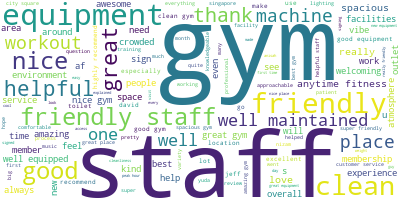

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(top_5_reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

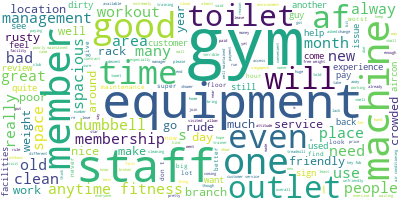

In [19]:
# Join the different processed titles together.
long_string = ','.join(list(bottom_5_reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

📊 Vocabulary size after filtering: 4696
📋 Total documents: 4217


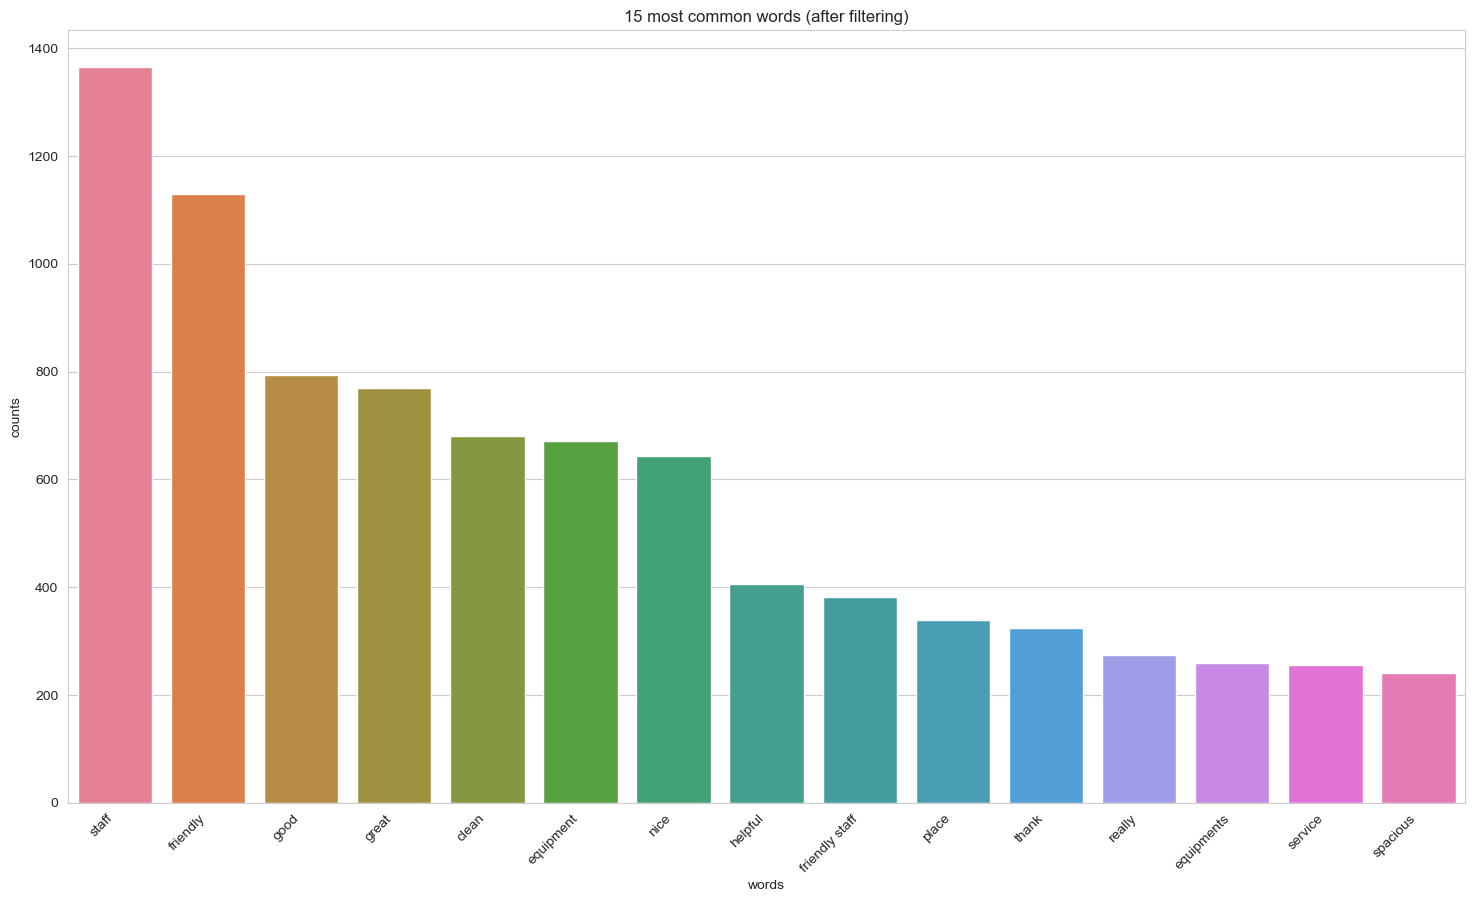

In [20]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Define custom stop words (common gym/fitness terms that aren't very informative)
custom_stop_words = [
    'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
    'visit', 'go', 'come', 'use', 'work', 'train'
]

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]  # Show top 15
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words (after filtering)')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=45, ha='right') 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.show()

# Combine default English stop words with custom gym-related stop words
all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words

# Initialise the count vectorizer with extended stop words
count_vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2)  # Include both single words and bigrams
)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(top_5_reviews['review_text_processed'])

print(f"📊 Vocabulary size after filtering: {len(count_vectorizer.get_feature_names_out())}")
print(f"📋 Total documents: {count_data.shape[0]}")

# Visualise the most common words after filtering
plot_10_most_common_words(count_data, count_vectorizer)

📊 Vocabulary size after filtering: 1898
📋 Total documents: 930


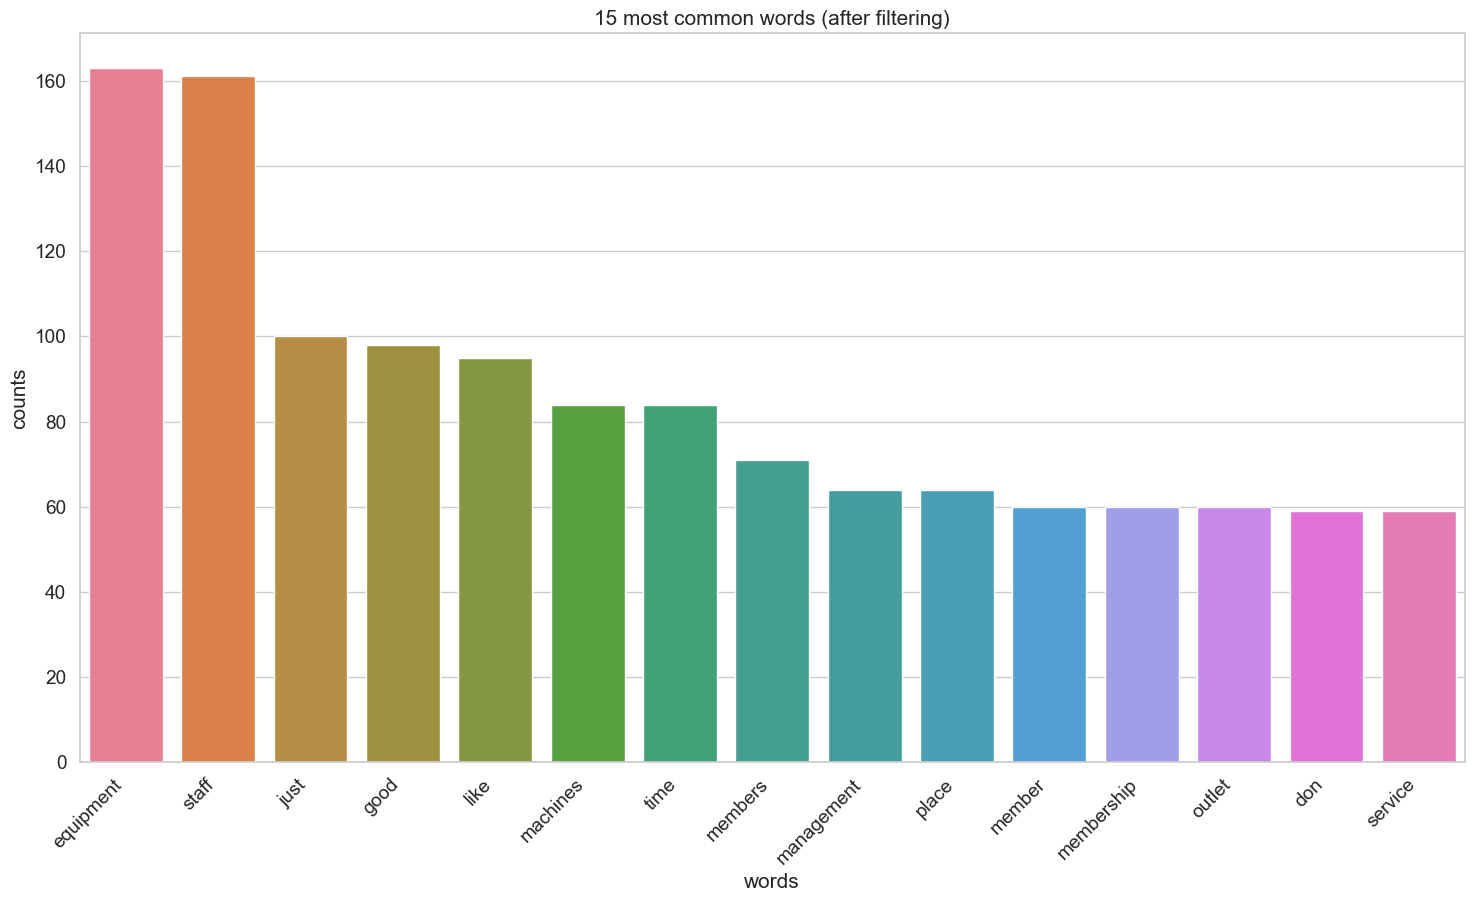

In [21]:
count_data = count_vectorizer.fit_transform(bottom_5_reviews['review_text_processed'])

print(f"📊 Vocabulary size after filtering: {len(count_vectorizer.get_feature_names_out())}")
print(f"📋 Total documents: {count_data.shape[0]}")

# Visualise the most common words after filtering
plot_10_most_common_words(count_data, count_vectorizer)

In [22]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
equipment staff bad time membership really rude experience old management

Topic #1:
staff outlet time service rude customer just don equipment customer service

Topic #2:
place staff like nice members contract machines sign pay management

Topic #3:
equipment staff aircon just like people time bad members big

Topic #4:
machines equipment good staff space spacious maintained like weights outlet

Topic #5:
area free weights management branch machines staff compared free weights good

Topic #6:
equipment staff area equipments good clean friendly don toilet great

Topic #7:
staff friendly just membership member time home friendly staff key told

Topic #8:
members maintained equipment equipments best like rusty member dirty service

Topic #9:
good equipment just machine need service location staff spacious bad


In [43]:
!pip install pyLDAvis==3.4.1

In [23]:
%%time
import warnings
import os
import pyLDAvis
import pyLDAvis.lda_model
import pickle 

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

try:
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
except FileNotFoundError:
    print(f"File not found: {LDAvis_data_filepath}. Preparing data instead.")
    LDAvis_prepared = pyLDAvis.lda_model.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the visualization as HTML
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

CPU times: total: 125 ms
Wall time: 169 ms


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.068599 -0.002525       1        1  17.067038
5     -0.067821  0.123788       2        1  15.598622
8     -0.067239 -0.001428       3        1  15.277413
3      0.010754 -0.036274       4        1  12.021185
7      0.072840  0.023114       5        1  10.518644
4     -0.096827 -0.103367       6        1  10.410871
1      0.089717  0.017091       7        1   4.854555
2     -0.063072 -0.047402       8        1   4.802414
9      0.141346 -0.097570       9        1   4.760787
6      0.048902  0.124574      10        1   4.688471, topic_info=             Term       Freq      Total Category  logprob  loglift
228          good  20.000000  20.000000  Default  30.0000  30.0000
214      friendly  10.000000  10.000000  Default  29.0000  29.0000
500         staff  41.000000  41.000000  Default  28.0000  28.0000
496      spacious  12.000000  12.000000  Default  27.0000  27.0000
330        member  20.000000  20.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
124      customer   1.152196  13.629083  Topic10  -4.7169   0.5895
382        outlet   0.923598  13.394029  Topic10  -4.9380   0.3858
500         staff   0.777013  41.085404  Topic10  -5.1109  -0.9079
142  disappointed   0.753644   3.160827  Topic10  -5.1414   1.6264
59         branch   0.753644   4.775282  Topic10  -5.1414   1.2138

[536 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.327262     10
0         7  0.327262     10
0        10  0.327262     10
1         5  0.439363    100
1         9  0.439363    100
...     ...       ...    ...
601       2  0.370130  worst
601       3  0.123377  worst
601       5  0.370130  worst
601       7  0.123377  worst
601       9  0.123377  worst

[1022 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 9, 4, 8, 5, 2, 3, 10, 7])